# Where Do the Amherst Police Department (APD) Police?
During a meeting with the Racial Equity Task Force, people reported that they felt that the APD over policed some parts of town. Anecdotally, it was reported that the apartment complexes were specifically over policed. Though data cannot report the feeling of individual citizens, we were interested if the data did confirm the feeling of over policing and unbalanced policing. 

This is Jupyter Notebook to teach you a little about what the data says about policing in Amherst, Massachusetts and how to create something similar for your town. First, you will need to download Python, I recommend the Anaconda suite. Honestly, if you are new to coding the best thing to do is search on YouTube Download Python Anaconda for your operating system (Mac, Windows, Linux). All programmers search stuff like this do not give up.

Once you have Python (it will probably take a 30 minutes to a couple of hours but you only have to do it once), you can open Jupyter Notebook. The best place to open a Jupyter Notebook is in a folder where your data is. This notebook was made in a folder called Defund413 and contains a folder called data. The folder data contains street centerlines created by the Amherst Town and data scrapped from publice police call logs by Defund413 volunteers. 

## Load in your Python packages
In order to do many things in a Jupyter Notebook you need to import a package. In the cell below we import all the packages we will need. 

In [3]:
import pandas as pd #pandas helps us with loading tables and managing moving parts of them
import geopandas as gpd #geopandas helps us with loading maps and making graphics one maps
import numpy as np #numpy helps us with numbers and math
from IPython.display import display #IPython.display let's us control how things are displayed in this notebook
import matplotlib.pyplot as plt #matplotlib.pyplot helps show you the user the plots and graphics
import matplotlib #matplotlib is the bigger library and to edit the settings sometimes we need to load it seperately

## Getting GIS Data
This page is dedicated to showing how to take a GIS map and plot data to it. The GIS maps used were found here: https://www.amherstma.gov/1432/Get-Amherst-GIS-Data
The search term used to find it was "Amherst GIS".

Geopandas reads .shape files so download the shape file for the street centerlines here: http://maps-amherstma.opendata.arcgis.com/datasets/ca58f69cc504478c94521f4aa63d1d90_14

In [4]:
fp = "data/Street_Centerlines-shp/Street_Centerlines.shp" #path to shape file notice it goes to the data folder
map_df = gpd.read_file(fp) #geopandas reads the shape file

## What are we doing check?
Okay, so what have we done so far and why would we do it? We wanted to see if we could match up the the call log data to a map of Amherst to make a meaningful graphic to show to people who might not otherwise believe personal stories. So we wanted to load in a map of Amherst, MA that we could put the call log data on. So we have download and imported software made by others to do just that (python, geopandas). Now we have map_df (map dataframe) that we can plot to see all the streets in Amherst.

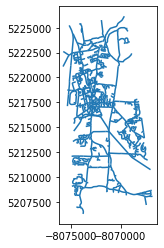

In [5]:
map_df.plot()

Now this map is not perfect at all. It's small. The numbers on the side are confusing and do not serve much purpose for the general public. Don't worry! We will deal with that later. Let's keep moving toward our goal of getting police data on this map.

## What data do we have?
We have this GIS map and the table that makes it and we have public call logs that have been organized into a csv (comma separated values--basically a spreadsheet)file. In another tutorial we may discuss how we took these pdf files given to the public: https://www.amherstma.gov/826/Arrest-and-Call-Log
to these google sheets: https://docs.google.com/spreadsheets/d/1W5213dLRzzVcG2kEr1TiH8dEkDnN2G-w7hi3n1Fma-M/edit?usp=sharing
https://docs.google.com/spreadsheets/d/173-vYp9GJjzPy0w-cv_tFWNW-NfKtJu_KGsWnoWhC_0/edit#gid=268964806 (has tabs)

Pandas and Geopandas has a .head() command that can give you a sense of what your dataframe looks like. You can download google sheets as xlsx (excel files) or csv files. I chose xlsx. Notice since the Call Logs files have mulitple sheets in the read command you have to signify a sheet_name. 

In [6]:
df = pd.read_excel("data/APD Call Logs FY20.xlsx", sheet_name="Call Logs 519-520") #reads in Call Logs 
df.tail() #shows a few rows of dataframe 

,Month,Date,Call Number,Time,Call Type,Reason,Action,Location,Bucket
11008,Sep,2019-09-24,19-16218,127,Initiated,M V Stop,Warning - Verbal MV Stop,ZANNA - NORTH PLEASANT ST,Vehicle Related
11009,Oct,2019-10-27,19-18776,138,Initiated,M V Stop,Arrest(s) - Adult,ZANNA - NORTH PLEASANT ST,Vehicle Related
11010,Sep,2019-09-20,19-15966,2252,Initiated,M V Stop,Warning - Verbal MV Stop,ZANNA - NORTH PLEASANT ST,Vehicle Related
11011,Dec,2019-12-03,19-21205,2308,Initiated,M V Stop,Services Rendered,ZANNA - NORTH PLEASANT ST,Vehicle Related
11012,Dec,2019-12-22,19-22342,234,Initiated,Suspicious M V,Services Rendered,ZHANGS - WEST ST,Disturbance/Suspicious Behavior


Next we want to change the display options so we can show the much larger table in map_df.

In [7]:
pd.options.display.max_columns = None
map_df.head()

,OBJECTID,PREFIX,NAME,TYPE,SUFFIX,POLICENAME,POLICETYPE,Date_Added,Editor,Method,FULLPOLNAM,CarteID,CrossStree,CrossStr_1,Date_Chang,FULL_NAME,LF_Addr,LT_Addr,RF_Addr,RT_Addr,MATERIAL,OWNER,FUNCTIONAL,JURISDICTI,ROUTESYSTE,ROUTENUMBE,SpeedLimit,Scenic,RowWidth,AcceptDate,GlobalID,created_us,created_da,last_edite,last_edi_1,MUNILEFT,MUNIRIGHT,ZIPLEFT,ZIPRIGHT,STATELEFT,STATERIGHT,OneWay,geometry
0,1,None,PULPIT HILL,RD,None,PULPIT HILL,RD,None,OlkinM,None,PULPIT HILL RD,None,MILL ST,None,None,PULPIT HILL RD,122.0,524.0,121.0,525.0,2.0,1.0,0,2,None,None,NaN,1.0,33',1759-04-15,{504DD01D-5BE6-437A-AA88-65D9E4561233},None,None,olkinm,2013-07-29,AMHERST,AMHERST,01002,01002,MA,MA,None,"LINESTRING (-8073128.873 5223741.029, -8073125..."
1,2,None,PULPIT HILL,RD,None,PULPIT HILL,RD,None,None,None,PULPIT HILL RD,00321,None,LEVERETT RD,None,PULPIT HILL RD,526.0,582.0,527.0,583.0,1.0,1.0,0,2,None,None,NaN,1.0,33',1759-04-15,{021127C6-DEAC-4682-990E-E1A9E760043B},None,None,olkinm,2013-07-29,AMHERST,AMHERST,01002,01002,MA,MA,None,"LINESTRING (-8072065.823 5224044.340, -8072046..."
2,3,S,ORCHARD,DR,None,SOUTH ORCHARD,DR,None,None,None,SOUTH ORCHARD DR,00039,MIDDLE ST,BARRY CIR,None,S ORCHARD DR,4.0,4.0,5.0,15.0,1.0,1.0,0,2,None,None,NaN,NaN,50',None,{A2F53F9C-3359-4D1C-97C5-9CA33DA35FC9},None,None,None,None,AMHERST,AMHERST,01002,01002,MA,MA,None,"LINESTRING (-8071293.583 5209676.871, -8071085..."
3,4,None,RAMBLING,RD,None,RAMBLING,RD,None,None,None,RAMBLING RD,00103,AUTUMN LN,MCINTOSH DR,None,RAMBLING RD,42.0,94.0,43.0,85.0,1.0,1.0,0,2,None,None,NaN,NaN,49.21',None,{8BF9253A-6B7B-47CF-8506-5644E86AD9A0},None,None,None,None,AMHERST,AMHERST,01002,01002,MA,MA,None,"LINESTRING (-8074455.293 5208284.068, -8074471..."
4,5,None,ELF HILL,RD,None,ELF HILL,RD,None,None,None,ELF HILL RD,00159,STAGECOACH RD,ORCHARD ST & HULST RD,None,ELF HILL RD,34.0,52.0,35.0,55.0,1.0,1.0,0,2,None,None,NaN,NaN,50',None,{72506E70-5A29-4ACE-997E-944B9194783D},None,None,None,None,AMHERST,AMHERST,01002,01002,MA,MA,None,"LINESTRING (-8066933.134 5208321.796, -8066980..."


## We've Looked at the Data
Now we can see that the call log data and the GIS data seem to have some similariities. The column Location in the call logs and the column FULLPOLNAM are similar, but in the call log there is often an identifier before the street name. This will need to be stripped off. To do this I first got all the individual locations in the call logs and stored in a csv call locations.

In [8]:
locations=df['Location'].drop_duplicates() #drops all duplicate location in the police call log
locations.to_csv('data/locations.csv', header=False) #writes a csv file in the data folder

Now in a spreadsheet editing software (Excel) stripped the description before the ' - '. I did this by using the feature under the data tab in Excel called text to columns. This allows you to make one column two columns where the border is defined by a specific character. I then did some manual cleaning to create the new file locations_edit.csv

In [9]:
loc_df = pd.read_csv('data/locations_edit.csv', index_col=0) #reads in file
loc_df

,Location,STLOCATION
0,MONTAGUE RD,MONTAGUE RD
1,APD - MAIN ST,MAIN ST
1314,MAIN ST,MAIN ST
1315,ROLLING GREEN 77 - BELCHERTOWN RD,BELCHERTOWN RD
1316,JOHN NUTTING APT 34 - CHESTNUT CT,CHESTNUT CT
1317,JOHN NUTTING APTS 34 - CHESTNUT CT,CHESTNUT CT
1318,ROLLING GREEN 78 - BELCHERTOWN RD,BELCHERTOWN RD
1322,EDGEHILL PL,EDGEHILL PL
1325,PULPIT HILL RD,PULPIT HILL RD
1326,CHESTNUT CT APTS 31 - CHESTNUT CT,CHESTNUT CT


## Merging with the Call Log
Now that we have matched a street name with each location listed on the call log we want to add a comlumn to the call log that has the easier to the read street name that we just matched to the locations.

In [10]:
df_st=df.merge(loc_df[['Location', 'STLOCATION']], how='left', on='Location') #merges the location dictionary csv file
#how='left' says make sure all the rows in the left database
#on='Location' says to merge the two dataframe on the location columns
print(df.shape)#prints the (number of rows, number of columns) in the dataframe
print(df_st.shape)#prints the (number of rows, number of columns) in the dataframe


(11013, 9)
(11013, 10)


A lot of calls happen at the police station. So we want to remove those because that doesn't tell us much about how the APD is moving around. So let's remove all the rows with APD in the "old" Location column.

In [11]:
df_nAPD = df_st.loc[~df_st['Location'].str.contains("APD")].copy() #the ~ is the not symbol so this says take df_st rows that
# do not contain the string APD
print(df_nAPD.shape) #prints the (number of rows, number of columns) in the dataframe

(9676, 10)


## Graphing The Map
The map we want to graph is the map Amherst and we want the streets to be colored in away that shows how many police calls are completed on that street. 

Remember at the beging the map was so small so let's edit the matplotlib settings so that size of the font is a lot bigger and bolder.

In [10]:
font = {'weight' : 'bold',
        'size'   : 22}#dictionary saying  font bold and the size 22

matplotlib.rc('font', **font)# the ** tells python to read the dictionary to the program and the matplotlib.rc tells
#matplotlib to change the settings

## The Fun Part
Now that everything is set up we can now count the number of calls on each street and plot it on the map.

The first map we wanted to create was a map that showed where the police were responding to calls. First we decided to remove calls that we located at the police station. 

In [15]:
cf = pd.DataFrame()#creates an empty dataframe
cf[['STLOCATION','Count of Calls']] = df_nAPD.groupby('STLOCATION')['Call Number'].count().reset_index() #groups 
#the calls by stlocation or street name and then counts the number in each group 
cf['Count of Calls'].sum() # sum the counts to check that all the calls we saw above are still there


9676

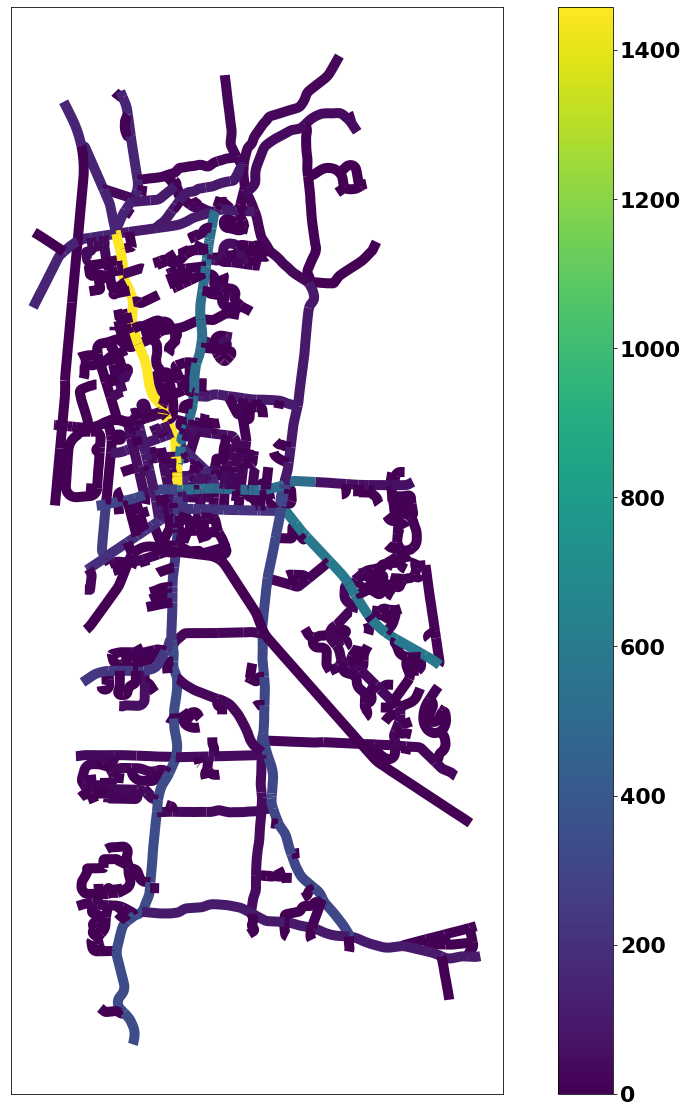

In [12]:
map_dff = map_df.merge(cf, how='left', right_on='STLOCATION', left_on='FULLPOLNAM')#this merges the map dataframe that
# can draw the map to the data frame with the counts of calls
map_dff['Count of Calls']=map_dff['Count of Calls'].fillna(0) #some streets will have no call and 
#the merge will give them NAN (not a number) instead of zero, so we fill the nan's with 0

fig, ax = plt.subplots(1, 1, figsize=(20,20))# this command makes the figure and figsize=(20,20) makes the map much 
#bigger

ax.set_xticks([])#This removes the numbers on the x axis [] is a blank list
ax.set_yticks([])#This removes the numbers on the y axis 
map_dff.plot(column='Count of Calls', ax=ax,legend=True, linewidth=10) #this plots the map with a colorbar and line
fig.savefig('figures/Number of Calls By Street No APD-MAIN.png', dpi=fig.dpi) 

The map above shows that the police in Amherst are most often responding to North Pleasant St. In Amherst, North Pleasant St is a main street. It houses bars, a shelter for houseless people, and the larges apartment complex. 

One might think this street may really have the most crime and maybe people really do call for help here a lot, but in Amherst the police use a more proactive policing approach. Let's look at a map of calls that the police initiated, meaning no citizen called into the station to ask for assistance.

(3901, 12)


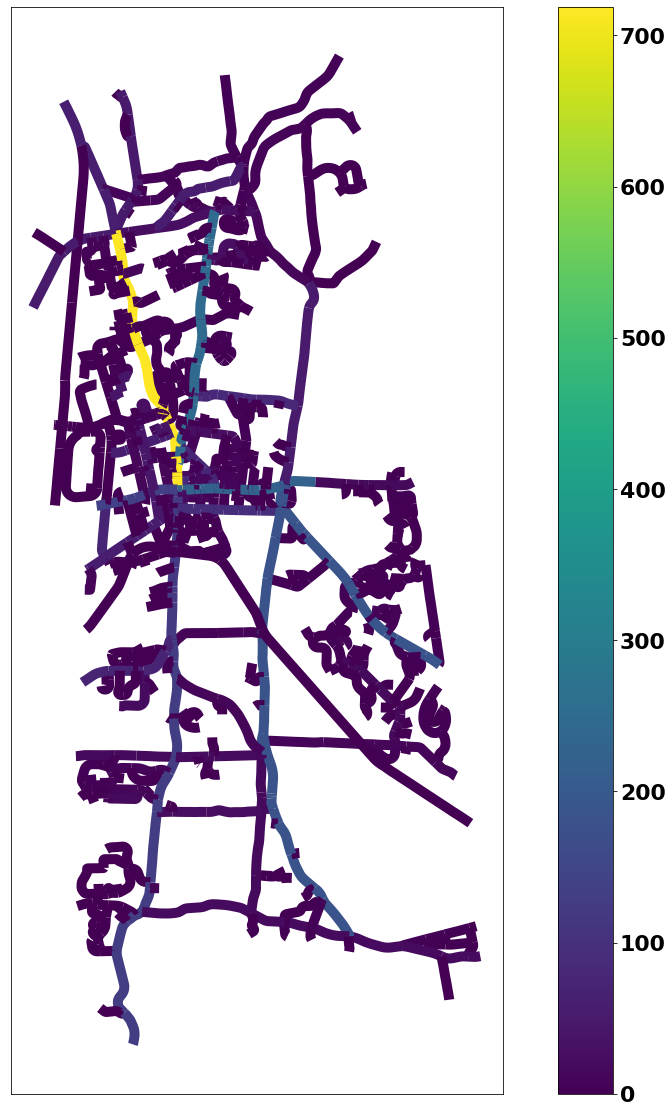

In [33]:
df_in = df_nAPD.loc[df_nAPD['Call Type']=='Initiated'].copy()
print(df_in.shape)
cf = pd.DataFrame()
cf[['STLOCATION','Count of Calls']] = df_in.groupby('STLOCATION')['Call Number'].count().reset_index() #groups the calls by stlocation or street name 
#and then counts the number in each group 
cf['Count of Calls'].sum()
map_dff = map_df.merge(cf, how='left', right_on='STLOCATION', left_on='FULLPOLNAM')#this merges the map dataframe that
# can draw the map to the data frame with the counts of calls
map_dff['Count of Calls']=map_dff['Count of Calls'].fillna(0) #some streets will have no call and 
#the merge will give them NAN (not a number) instead of zero, so we fill the nan's with 0

fig, ax = plt.subplots(1, 1, figsize=(20,20))# this command makes the figure and figsize=(20,20) makes the map much 
#bigger

ax.set_xticks([])#This removes the numbers on the x axis [] is a blank list
ax.set_yticks([])#This removes the numbers on the y axis 
map_dff.plot(column='Count of Calls', ax=ax,legend=True, linewidth=10) #this plots the map with a colorbar and line
fig.savefig('figures/Number of Calls By Street Initiated.png', dpi=fig.dpi) 

In the map above, you can see that it almost identical. The pattern does not change. The same strees are lighting up. 

Now the next type of call that we were interested in looking at the pattern of is one that we would consider Disturbance/Suspicious Behavior. So these are calls were the crime is not totally obvious before police intervention. We wanted to show in Amherst where these types of calls were responded to. So this map is of all calls that were responding to a Disturbance or "Suspicious" Behavior (except the ones at the police station).

(1955, 10)


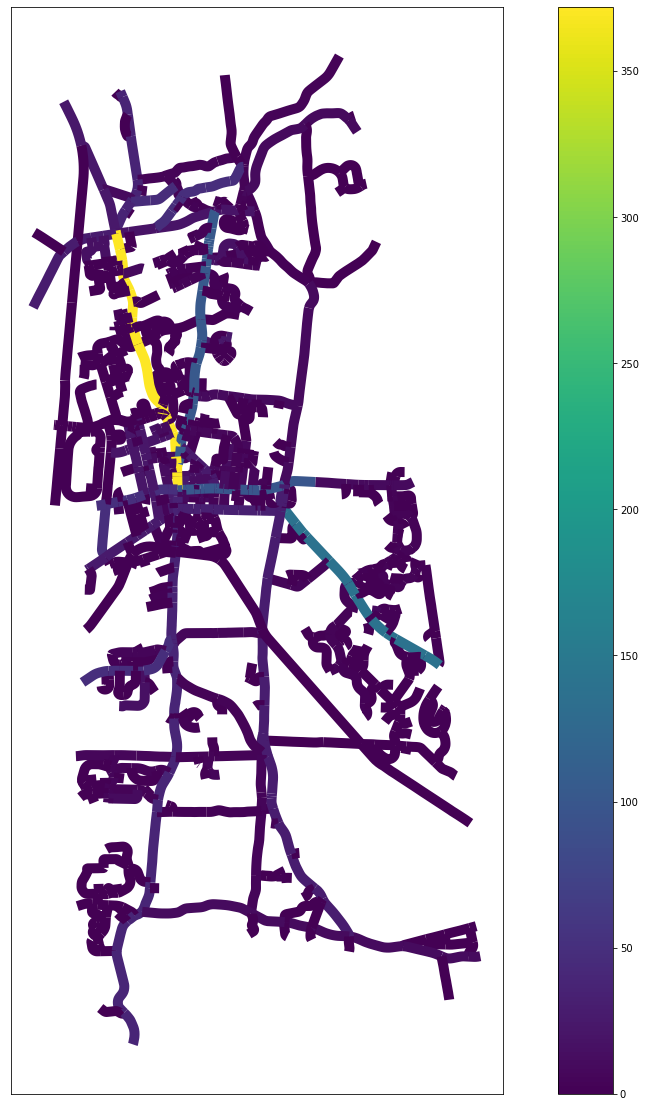

In [17]:
df_in = df_nAPD.loc[df_nAPD['Bucket']=='Disturbance/Suspicious Behavior'].copy()
print(df_in.shape)
cf = pd.DataFrame()
cf[['STLOCATION','Count of Calls']] = df_in.groupby('STLOCATION')['Call Number'].count().reset_index() #groups the calls by stlocation or street name 
#and then counts the number in each group 
cf['Count of Calls'].sum()
map_dff = map_df.merge(cf, how='left', right_on='STLOCATION', left_on='FULLPOLNAM')#this merges the map dataframe that
# can draw the map to the data frame with the counts of calls
map_dff['Count of Calls']=map_dff['Count of Calls'].fillna(0) #some streets will have no call and 
#the merge will give them NAN (not a number) instead of zero, so we fill the nan's with 0

fig, ax = plt.subplots(1, 1, figsize=(20,20))# this command makes the figure and figsize=(20,20) makes the map much 
#bigger

ax.set_xticks([])#This removes the numbers on the x axis [] is a blank list
ax.set_yticks([])#This removes the numbers on the y axis 
map_dff.plot(column='Count of Calls', ax=ax,legend=True, linewidth=10) #this plots the map with a colorbar and line
fig.savefig('figures/Number of Calls By Street Suspicious.png', dpi=fig.dpi) 

In [37]:
df_nAPD['Day'] = df_nAPD['Date'].dt.day_name()
df_nAPD

,Month,Date,Call Number,Time,Call Type,Reason,Action,Location,Bucket,STLOCATION,Day
0,Jun,2019-06-23,19-10531,1420,Phone,Animal Complaint,Services Rendered,MONTAGUE RD,Animal Complaint,MONTAGUE RD,Sunday
1314,Nov,2019-11-26,19-20719,1124,Initiated,Admin Duty,Services Rendered,MAIN ST,Administrative,MAIN ST,Tuesday
1315,Apr,2020-04-10,20-5913,616,911,Noise Complaint,Gone On Arrival,ROLLING GREEN 77 - BELCHERTOWN RD,Disturbance/Suspicious Behavior,BELCHERTOWN RD,Friday
1316,Jan,2020-01-01,20-32,1608,911,911 Hang Up,Services Rendered,JOHN NUTTING APT 34 - CHESTNUT CT,Waste of time,CHESTNUT CT,Wednesday
1317,Mar,2020-03-22,20-4811,1432,Phone,911 Hang Up,Services Rendered,JOHN NUTTING APTS 34 - CHESTNUT CT,Waste of time,CHESTNUT CT,Sunday
1318,Jul,2019-07-31,19-12479,958,Phone,Assist Business / Agency,Services Rendered,ROLLING GREEN 78 - BELCHERTOWN RD,Helping resident/business,BELCHERTOWN RD,Wednesday
1319,Sep,2019-09-27,19-16511,1610,Initiated,Assist Business / Agency,Services Rendered,ROLLING GREEN 78 - BELCHERTOWN RD,Helping resident/business,BELCHERTOWN RD,Friday
1320,Sep,2019-09-19,19-15788,819,911,Assist Citizen,Services Rendered,ROLLING GREEN 78 - BELCHERTOWN RD,Helping resident/business,BELCHERTOWN RD,Thursday
1321,Jul,2019-07-30,19-12459,2100,Initiated,Follow Up,Services Rendered,ROLLING GREEN 78 - BELCHERTOWN RD,Follow Up,BELCHERTOWN RD,Tuesday
1322,Jun,2019-06-12,19-9920,44,Phone,Noise Complaint,Warning Issued,EDGEHILL PL,Disturbance/Suspicious Behavior,EDGEHILL PL,Wednesday


(5342, 11)


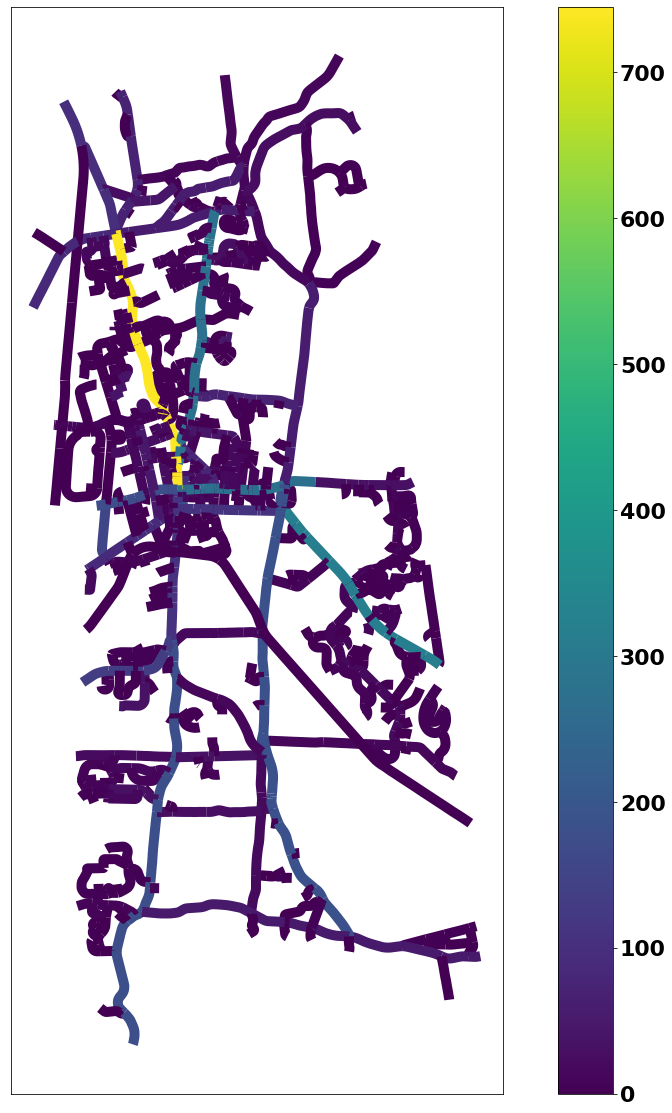

In [47]:
df_nWE=df_nAPD.loc[~df_nAPD['Day'].isin(['Friday', 'Saturday','Sunday'])].copy()
print(df_nWE.shape)
cf = pd.DataFrame()
cf[['STLOCATION','Count of Calls']] = df_nWE.groupby('STLOCATION')['Call Number'].count().reset_index() #groups the calls by stlocation or street name 
#and then counts the number in each group 
cf['Count of Calls'].sum()
map_dff = map_df.merge(cf, how='left', right_on='STLOCATION', left_on='FULLPOLNAM')#this merges the map dataframe that
# can draw the map to the data frame with the counts of calls
map_dff['Count of Calls']=map_dff['Count of Calls'].fillna(0) #some streets will have no call and 
#the merge will give them NAN (not a number) instead of zero, so we fill the nan's with 0

fig, ax = plt.subplots(1, 1, figsize=(20,20))# this command makes the figure and figsize=(20,20) makes the map much 
#bigger

ax.set_xticks([])#This removes the numbers on the x axis [] is a blank list
ax.set_yticks([])#This removes the numbers on the y axis 
map_dff.plot(column='Count of Calls', ax=ax,legend=True, linewidth=10) #this plots the map with a colorbar and line
fig.savefig('figures/Number of Calls By Street no weekend.png', dpi=fig.dpi) 

No matter what type of call or category of call we choose we wind up in the same place. The places that are lighting up are North Pleasant and other roads with with large apartment complexes on them. 

Okay, but you're right Amherst is a college town, this must all be the off campus housing right? So let's check it. Let's assume that most partying calls happen from 7pm to 8am. This is a big assumption of course, but it's the best we can do. So below we show only the calls that were responded between 8am and 7pm or day time calls. 

In [59]:
df_nAPD['Time'] = pd.to_numeric(df_nAPD['Time'], errors='coerce')

(5805, 11)


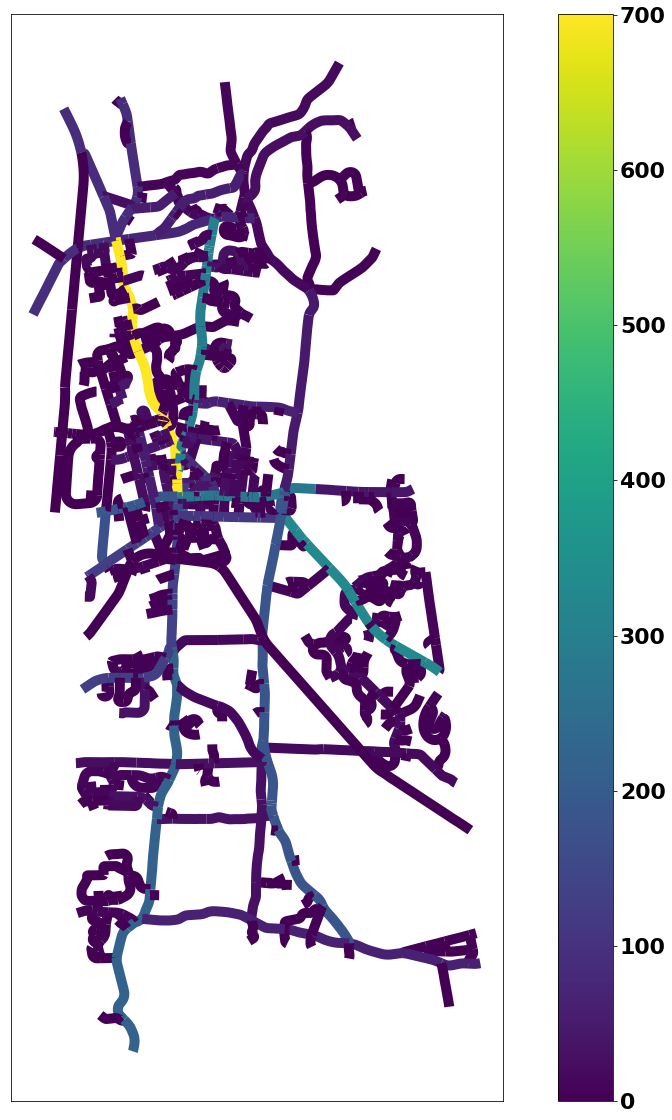

In [60]:
df_n=df_nAPD.loc[df_nAPD['Time']<1900].copy()
df_nWE = df_n.loc[df_n['Time']>800].copy()
print(df_nWE.shape)
cf = pd.DataFrame()
cf[['STLOCATION','Count of Calls']] = df_nWE.groupby('STLOCATION')['Call Number'].count().reset_index() #groups the calls by stlocation or street name 
#and then counts the number in each group 
cf['Count of Calls'].sum()
map_dff = map_df.merge(cf, how='left', right_on='STLOCATION', left_on='FULLPOLNAM')#this merges the map dataframe that
# can draw the map to the data frame with the counts of calls
map_dff['Count of Calls']=map_dff['Count of Calls'].fillna(0) #some streets will have no call and 
#the merge will give them NAN (not a number) instead of zero, so we fill the nan's with 0

fig, ax = plt.subplots(1, 1, figsize=(20,20))# this command makes the figure and figsize=(20,20) makes the map much 
#bigger

ax.set_xticks([])#This removes the numbers on the x axis [] is a blank list
ax.set_yticks([])#This removes the numbers on the y axis 
map_dff.plot(column='Count of Calls', ax=ax,legend=True, linewidth=10) #this plots the map with a colorbar and line
fig.savefig('figures/Number of Calls By Street day time.png', dpi=fig.dpi) 

The pattern continues. One street is actually lighting up more than usual and that is Belchertown Rd. This house Colonial Village. A large apartment complex with many families. 

During the town meeting an officer said the initiated calls were follow up calls. I wanted to show what the data said about this.

(3298, 10)


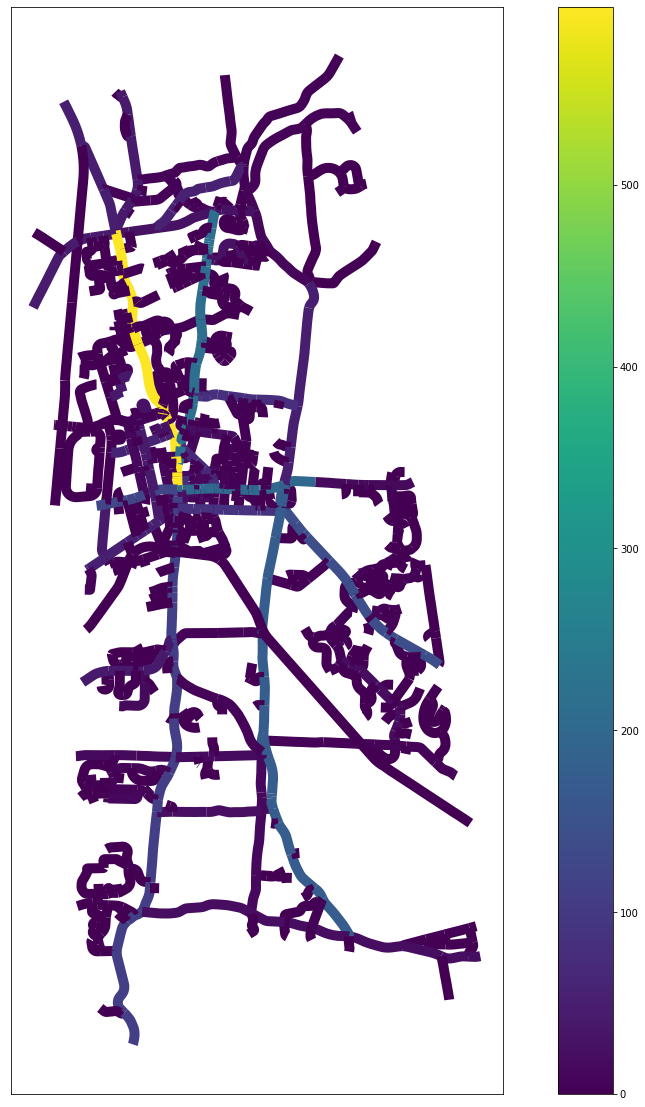

In [22]:
df_nFoll=df_nAPD.loc[~df_nAPD['Reason'].str.contains("Follow Up", na=False)].copy()
df_nFoll=df_nFoll[df_nFoll['Call Type'].str.contains("Initiated", na=False)].copy()
print(df_nFoll.shape)
cf = pd.DataFrame()
cf[['STLOCATION','Count of Calls']] = df_nFoll.groupby('STLOCATION')['Call Number'].count().reset_index() #groups the calls by stlocation or street name 
#and then counts the number in each group 
cf['Count of Calls'].sum()
map_dff = map_df.merge(cf, how='left', right_on='STLOCATION', left_on='FULLPOLNAM')#this merges the map dataframe that
# can draw the map to the data frame with the counts of calls
map_dff['Count of Calls']=map_dff['Count of Calls'].fillna(0) #some streets will have no call and 
#the merge will give them NAN (not a number) instead of zero, so we fill the nan's with 0

fig, ax = plt.subplots(1, 1, figsize=(20,20))# this command makes the figure and figsize=(20,20) makes the map much 
#bigger

ax.set_xticks([])#This removes the numbers on the x axis [] is a blank list
ax.set_yticks([])#This removes the numbers on the y axis 
map_dff.plot(column='Count of Calls', ax=ax,legend=True, linewidth=10) #this plots the map with a colorbar and line
fig.savefig('figures/Number of Police Initiated Calls By Street No Follow Up.png', dpi=fig.dpi) 

In [12]:
df_nAPD['Reason'].drop_duplicates()

0                   Animal Complaint
1314                      Admin Duty
1315                 Noise Complaint
1316                     911 Hang Up
1318        Assist Business / Agency
1320                  Assist Citizen
1321                       Follow Up
1323                      Suspicious
1324                         Larceny
1325                Well Being Check
1328              Community Policing
1330                     Disturbance
1334                   M V Crash P D
1336                    Assist A F D
1344                  Suspicious M V
1345                       Vandalism
1358                         Assault
1364              Recovered Property
1373                Assist Other P D
1375                 T B L Violation
1380                       B & E M V
1394                           B & E
1409                           Fight
1426                         Traffic
1433               Citizen Transport
1492                Annoying Call(s)
1505                 Summons Service
1